In [96]:
import numpy as np
import tensorflow as tf

In [97]:
data_dir = 'Rice_Image_Dataset/Train'
batch_size = 64
img_height = 50
img_width = 50

In [98]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 50000 files belonging to 5 classes.
Using 40000 files for training.


In [99]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 50000 files belonging to 5 classes.
Using 10000 files for validation.


In [100]:
class_names = train_ds.class_names
class_names

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [101]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [102]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [103]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
  metrics=['accuracy'])

In [104]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10


2022-06-13 01:59:23.404962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


624/625 [============================>.] - ETA: 0s - loss: 0.1213 - accuracy: 0.9553

2022-06-13 01:59:44.891857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


625/625 [==============================] - 24s 30ms/step - loss: 0.1212 - accuracy: 0.9553 - val_loss: 0.0683 - val_accuracy: 0.9775
Epoch 2/10
625/625 [==============================] - 17s 27ms/step - loss: 0.0587 - accuracy: 0.9796 - val_loss: 0.0502 - val_accuracy: 0.9824
Epoch 3/10
625/625 [==============================] - 17s 27ms/step - loss: 0.0410 - accuracy: 0.9860 - val_loss: 0.0488 - val_accuracy: 0.9835
Epoch 4/10
625/625 [==============================] - 17s 28ms/step - loss: 0.0314 - accuracy: 0.9896 - val_loss: 0.0704 - val_accuracy: 0.9772
Epoch 5/10
625/625 [==============================] - 17s 27ms/step - loss: 0.0287 - accuracy: 0.9905 - val_loss: 0.0342 - val_accuracy: 0.9907
Epoch 6/10
625/625 [==============================] - 17s 27ms/step - loss: 0.0217 - accuracy: 0.9929 - val_loss: 0.0606 - val_accuracy: 0.9802
Epoch 7/10
625/625 [==============================] - 17s 28ms/step - loss: 0.0207 - accuracy: 0.9924 - val_loss: 0.0658 - val_accuracy: 0.9788
Epo

In [105]:
model.save('model.h5')

1/1 [==============================] - 0s 200ms/step
[9.999e+01 0.000e+00 0.000e+00 0.000e+00 1.000e-02]
 ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
Prediction:  Arborio 99.99274015426636%


2022-06-13 02:12:09.502178: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


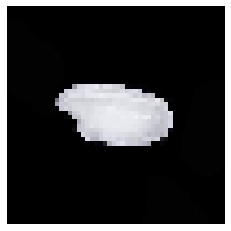

In [107]:
import matplotlib.pyplot as plt

model = tf.keras.models.load_model('model.h5')

classes = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

path = 'Rice_Image_Dataset/Train/Arborio/Arborio (1).jpg'

img = tf.keras.preprocessing.image.load_img(path, target_size=(img_height, img_width)) 
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)

plt.imshow(img)
plt.axis('off')
print(f"{(predictions[0]*100).round(2)}\n", classes)
print("Prediction: ", classes[np.argmax(predictions)], f"{predictions[0][np.argmax(predictions)]*100}%")